# Financial Machine Learning II (Practical)

## Author: Adamantios Ntakaris

### Week 1 - Seminar 1 

#### Part 2

##### Business School - University of Edinburgh 


# 1. Gradient Descent

In [59]:
# Perfrom Gradient Descent on synthetic data
data_points = [(1, 2), (3, 4)]

In [60]:
# Objective Function
def objective_function(weights):
    result = [(weights * x_1 - x_2)**2 for x_1, x_2 in data_points]
    return sum(result)

In [61]:
# Objective's Function Derivative
def derivative_objective_function(weights):
    derivative_result = [2*(weights * x_1 - x_2) * x_1 for x_1, x_2, in data_points]        
    return sum(derivative_result)

In [64]:
# Gradient Descent
weights = 0 
learning_rate = 0.001

for item in range(1000):
    result = objective_function(weights)
    derivative_result = derivative_objective_function(weights)
    weights = weights - learning_rate * derivative_result
    print('iteration {}: weights = {}, objective_function = {}'.format(item, weights, result))

## 2. RBF Neural Network

In [65]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Radial Basis Function

def rbf(X, cntrs, std):
    rbf_out = np.exp(-1 / (2 * std**2) * (X-cntrs)**2)
    return rbf_out

In [67]:
def kmeans(X, k):

    # Initialize Clusters - Randomly (we can also start from actual data points of the input data)
    clusters = np.random.choice(np.squeeze(X), size=k)
    old_clusters = clusters.copy() #Motivation for the copy here?

    stds = np.zeros(k) #Allocate memory 
    converged = False

    # ----------------------- Looping until Convergence ----------------------- #
    while not converged:
        
        point_cluster_dist = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :])) #Broadcasting for convenience 

        # Classify points to clusters based on the shortest distance
        shortest_path_cl = np.argmin(point_cluster_dist, axis=1)

        # Refresh cluster mean based on indexing 
        for i in range(k):
            indexing = X[shortest_path_cl == i]
            if len(indexing) > 0: #secure that the clsuter it is NOT empty
                clusters[i] = np.mean(indexing, axis=0)

        # Converge check - clusters stability
        converged = np.linalg.norm(clusters - old_clusters) < 1e-6 #Logical expression check
        old_clusters = clusters.copy()
    # ------------------------------------------------------------------------- #    

    # Final Version of the Converged Data
    point_cluster_dist = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    shortest_path_cl = np.argmin(point_cluster_dist, axis=1)

    # Calculate Standard Deviation per Cluster
    for i in range(k):
        indexing = X[shortest_path_cl == i]
        stds[i] = np.std(X[shortest_path_cl == i])

    return clusters, stds

In [78]:
class RBFNN(object):
      
    # Constructor for class attributes initialization     
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def _fit(self, X, y):
       
        # Data's standard deviation
        self.clusters, self.stds = kmeans(X, self.k)
        

        # Online training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.clusters, self.stds)])
                F = a.T.dot(self.w)

                loss = (y[i] - F).flatten() ** 2
                print('Loss: {0:.2f}'.format(loss[0]))

                # Backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error

    def _predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.clusters, self.stds)])
            F = a.T.dot(self.w)
            y_pred.append(F)
        return np.array(y_pred)

Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.09
Loss: 0.05
Loss: 0.02
Loss: 0.11
Loss: 0.07
Loss: 0.20
Loss: 0.13
Loss: 0.20
Loss: 0.14
Loss: 0.12
Loss: 0.14
Loss: 0.25
Loss: 0.22
Loss: 0.26
Loss: 0.29
Loss: 0.15
Loss: 0.18
Loss: 0.24
Loss: 0.21
Loss: 0.25
Loss: 0.20
Loss: 0.29
Loss: 0.21
Loss: 0.24
Loss: 0.25
Loss: 0.15
Loss: 0.17
Loss: 0.30
Loss: 0.18
Loss: 0.18
Loss: 0.21
Loss: 0.06
Loss: 0.14
Loss: 0.04
Loss: 0.04
Loss: 0.04
Loss: 0.05
Loss: 0.16
Loss: 0.15
Loss: 0.26
Loss: 0.43
Loss: 0.41
Loss: 0.66
Loss: 0.68
Loss: 0.90
Loss: 0.66
Loss: 1.02
Loss: 0.81
Loss: 0.94
Loss: 1.29
Loss: 1.48
Loss: 1.95
Loss: 2.06
Loss: 2.11
Loss: 1.83
Loss: 1.99
Loss: 2.13
Loss: 2.24
Loss: 2.12
Loss: 2.46
Loss: 2.52
Loss: 2.05
Loss: 2.19
Loss: 2.23
Loss: 1.89
Loss: 2.30
Loss: 2.04
Loss: 1.88
Loss: 2.13
Loss: 1.84
Loss: 1.72
Loss: 1.90
Loss: 1.44
Loss: 1.10
Loss: 1.15
Loss: 0.66
Loss: 0.93
Loss: 0.79
Loss: 0.53
Loss: 0.52
Loss: 0.43
Loss: 0.42
Loss: 0.64
Loss: 0.39
Loss: 0.33
Loss: 0.26
Loss: 0.36
Loss: 0.28

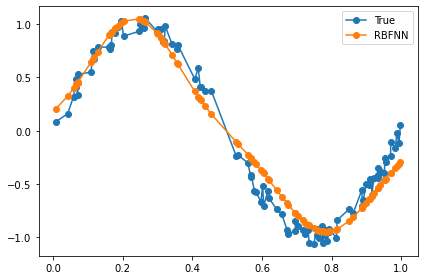

In [80]:
# Synthetic Experiment
synthetic_data_size = 100
X = np.random.uniform(0., 1., synthetic_data_size)
X = np.sort(X, axis=0)
gaussian_noise = np.random.uniform(-0.1, 0.1, synthetic_data_size)
y = np.sin(2 * np.pi * X)  + gaussian_noise

rbfNN = RBFNN(lr=1e-2, k=2)
rbfNN._fit(X, y)

y_pred = rbfNN._predict(X)

plt.plot(X, y, '-o', label='True')
plt.plot(X, y_pred, '-o', label='RBFNN')
plt.legend()

plt.tight_layout()
plt.show()